## **Sky-Subtraction Methods Comparision Notebook**
The following notebook evalutes and compares the various sky-subtraction methods that we have developed to date.  In this notebook we will evalute wether the sky removal methods has sufficiently removed the astrophysical sky from our data, we will also perform statistical checks on the residual data, this will allow us to understand the distribution of the residual data.  The first comparison checks we perform are done on data from observation block 1630519596.

In [1]:
import os
import sys
sys.path.append(os.path.abspath('.'))
import mkssins
from mkssins import *
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

In the next cell we define the observation block and path to the specific level masks we are working with. In this case we using observation block : 1630519596 and Level 1 masks for the data.

In [2]:
fname = '1630519596' 
path = '/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/'
pol = 'h'

In [ ]:
#just checking the mkssins.py module

ants = mkssins.ants_checked_L1(fname, path)


for ant in ants:
    print(ant)
 

 In the nest cell we  will loop over the ants in the list of antennas with masks and access the visData function from mkssins.py, we are storing the visibility products and the noise_diodes as seperate dictionaries, with 'ant' being the key for the values in the respective dictionaries. Also note we can add flags (SARAO Prior flags as well using the same approach)


In [ ]:
%time

raw_vis_dict = {}
nd_flags_dict ={}

for ant in ants:
    vis,nd_s0 = mkssins.visData(fname, ant[0] , pol) # replace ant[0] and remove loop for extracting the antenna as a string from the list
    raw_vis_dict[ant[0]] = vis
    nd_flags_dict[ant[0]] = nd_s0
    
    

In [5]:
raw_vis_dict.keys()  #checking the  raw vis  dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [6]:
nd_flags_dict.keys() #checking the noise diode flags  dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

 Similary in the next cell we can create a dictionary for the mask of the flags from the Level 1 folder. We use the try/except method to check for _mask2 / _mask flag masks for each receiver.

In [7]:

l1_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level1/mask/checked/')
for dish, (vis) in raw_vis_dict.items():
    
    try:
        with open(mask_dir / f'{fname}_{dish}_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print (f'mask2 loaded for dish {dish}')
    except(Exception):
        with open(mask_dir / f'{fname}_{dish}_mask', 'rb')as f:
            d3 = pickle.load(f)
            print (f'mask loaded for dish {dish}')
    mask_flags=d3['mask']
    l1_flags_dict[dish]  = mask_flags
    
        
   
    #print(dish)

mask loaded for dish m000
mask loaded for dish m001
mask2 loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask2 loaded for dish m006
mask loaded for dish m007
mask2 loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
mask2 loaded for dish m013
mask loaded for dish m014
mask2 loaded for dish m015
mask loaded for dish m016
mask2 loaded for dish m017
mask2 loaded for dish m018
mask2 loaded for dish m019
mask2 loaded for dish m020
mask loaded for dish m021
mask2 loaded for dish m023
mask loaded for dish m024
mask loaded for dish m025
mask2 loaded for dish m027
mask2 loaded for dish m029
mask loaded for dish m030
mask2 loaded for dish m031
mask loaded for dish m032
mask loaded for dish m033
mask2 loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask2 loaded for dish m039
mask loaded for dish m040
mask loaded for dish m0

In [8]:
l1_flags_dict.keys() #checking level1 flags dictionary

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [ ]:
from collections import defaultdict #stackexchange suggestion

d1 = l1_flags_dict
d2 = raw_vis_dict
d3 = nd_flags_dict

dd = defaultdict(list)

for d in (d1, d2, d3): # you can list as many input dicts as y
    for key, value in d.items():
        dd[key].append(value)
    
print(dd) # result: defaultdict(<type 'list'>, {1: [2, 6], 3: [4, 7]})


In [10]:
dd.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [9]:
masked_vis_dict = {}

for dish, (mask_flags, vis , nd_s0) in dd.items():
    masked_vis = MaskedArrayVisibilityFlags(vis, mask_flags, nd_s0)
    masked_vis_dict[dish] = masked_vis

In [12]:
masked_vis_dict.keys()


dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

In [76]:
data = masked_vis_dict['m000']

In [ ]:
data.filled()
data[1010:1030, 3001]

In [ ]:
data = masked_vis_dict['m001']

In [ ]:
data.filled()
data[1010:1030, 3001]

In [ ]:
for ant_value in masked_vis_dict.keys():
    print(ant_value)

#### Waterfall Panel of the Raw Visibilities

[<AxesSubplot:title={'center':'Raw Visibilities m000'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m001'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m002'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m003'}>,
 <AxesSubplot:title={'center':'Raw Visibilities m004'}>]

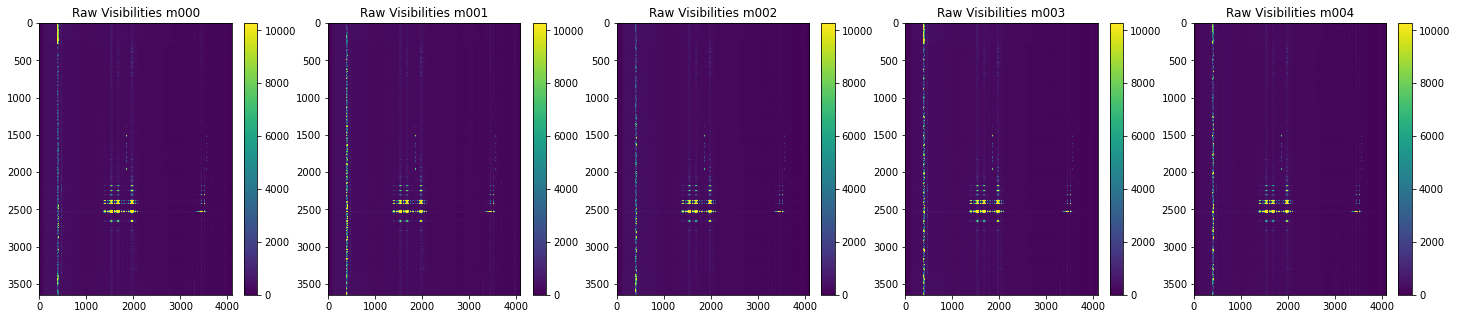

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(raw_vis_dict[ant_value], ax=ax, Title=f'Raw Visibilities {ant_value}', interpolation='nearest') for ant_value, ax in zip(raw_vis_dict, axes.flat) if ant_value in raw_vis_dict]

   

#### Waterfall Panel of the Raw Visibilities with Level 1 masks applied

[<AxesSubplot:title={'center':'vis+l1_flags m000'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m001'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m002'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m003'}>,
 <AxesSubplot:title={'center':'vis+l1_flags m004'}>]

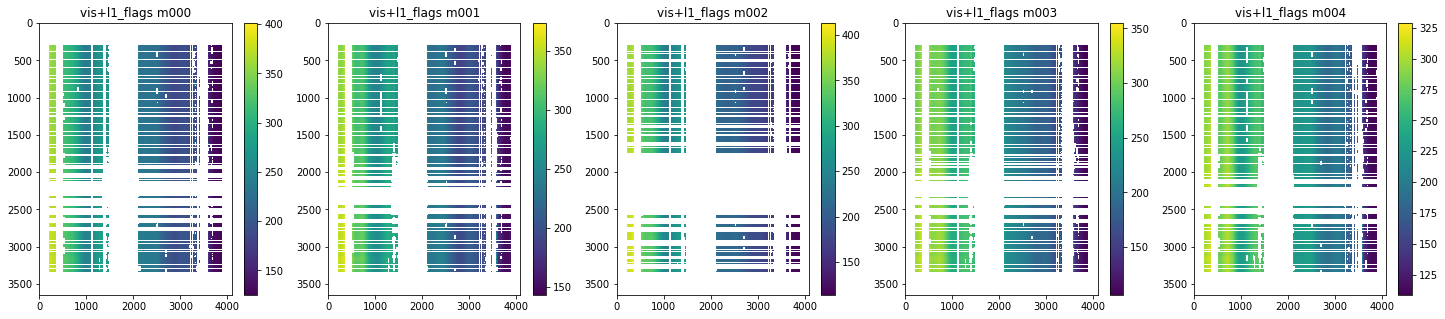

In [18]:
#fixed the waterfall as a panel, used a compression list since the for/if loops was quite troublesome in plotting the correct reciever waterfall

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(masked_vis_dict[ant_value].filled(), ax=ax, Title=f'vis+l1_flags {ant_value}', interpolation='nearest') for ant_value, ax in zip(masked_vis_dict, axes.flat) if ant_value in masked_vis_dict]

   

## Sky Subtraction Method : ABBA

In this Section we will apply the ABBA method, which involves subtracting subsequent time-channels in the array, in this method our differencing is done over 4 channels in the TOD array.


In [12]:
#After the masking of the data and the flags we apply the sky-subtraction function
abba_ss_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    visSS_data = abba(masked_vis)
    abba_ss_dict[ant_value] = visSS_data


abba_ss_dict.keys()

stacked_visSS_abba = np.stack(list(abba_ss_dict.values()), axis=0)

In [13]:
SS_all_ants = stacked_visSS_abba


<AxesSubplot:title={'center':'Sky-Subtractions of each antenna for a specific time and frequency channel'}>

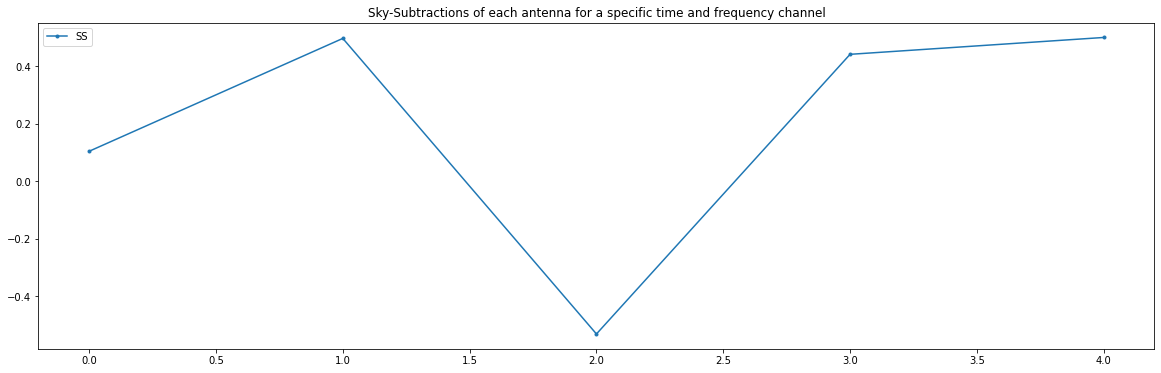

In [44]:
plot(SS_all_ants[:, 1010, 3000], Title='Sky-Subtractions of each antenna for a specific time and frequency channel', label='SS')  #this shows that the masked array Sky subs are now done as expected, we can see that for the four receivers there is a different sky-subtraction value


### Bandpass plots of the ABBA Sky-Subtraction for each Receiver

[<AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>,
 <AxesSubplot:title={'center':'Residual Data @ Freq channel: 3000'}>]

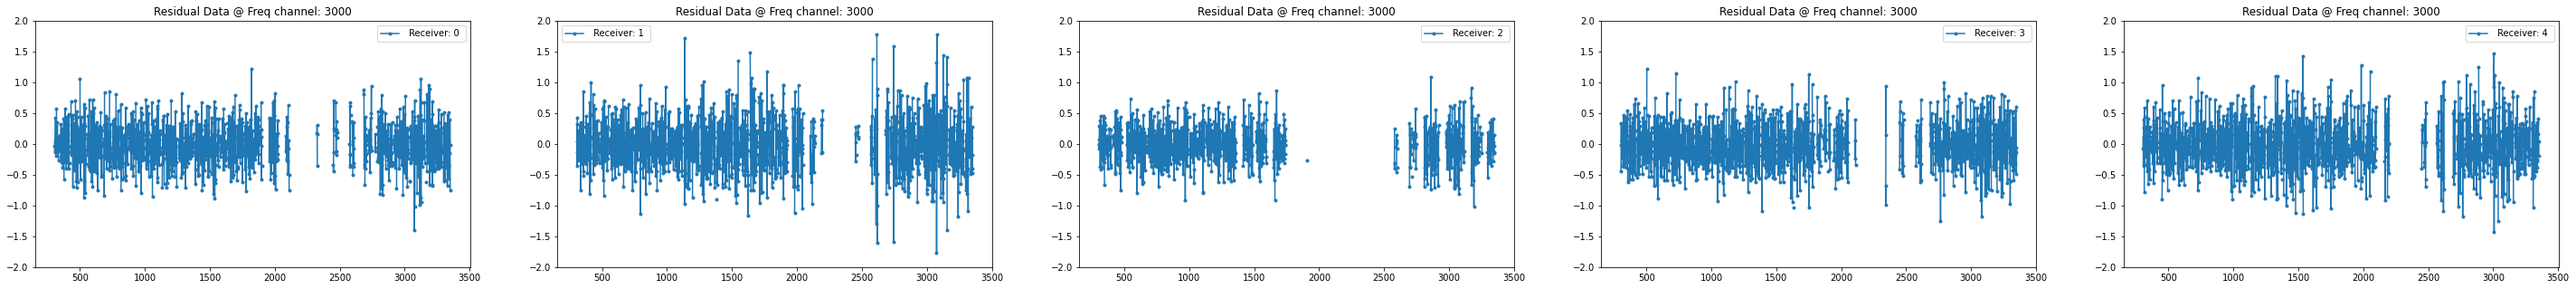

In [92]:
#Note this one is inspecting at one frequency channel (residual data plot)

rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(SS_all_ants[i, :, 3000], ylim= (-2,2), label= f" Receiver: {i} ", Title='Residual Data @ Freq channel: 3000', ax=ax) for i, ax in zip(range(0, len(ant_trunc)), axes.flat)]

Bandpass plots for each receiver sky-subtraction, we want to check for the those strange spikes we see in the all antenna average, if its attributed to the averaging of the spectrums.

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:7: RuntimeWarning: Mean of empty slice


[<AxesSubplot:title={'center':'Bandpass @ Receiver 0'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 1'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 2'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 3'}>,
 <AxesSubplot:title={'center':'Bandpass @ Receiver 4'}>]

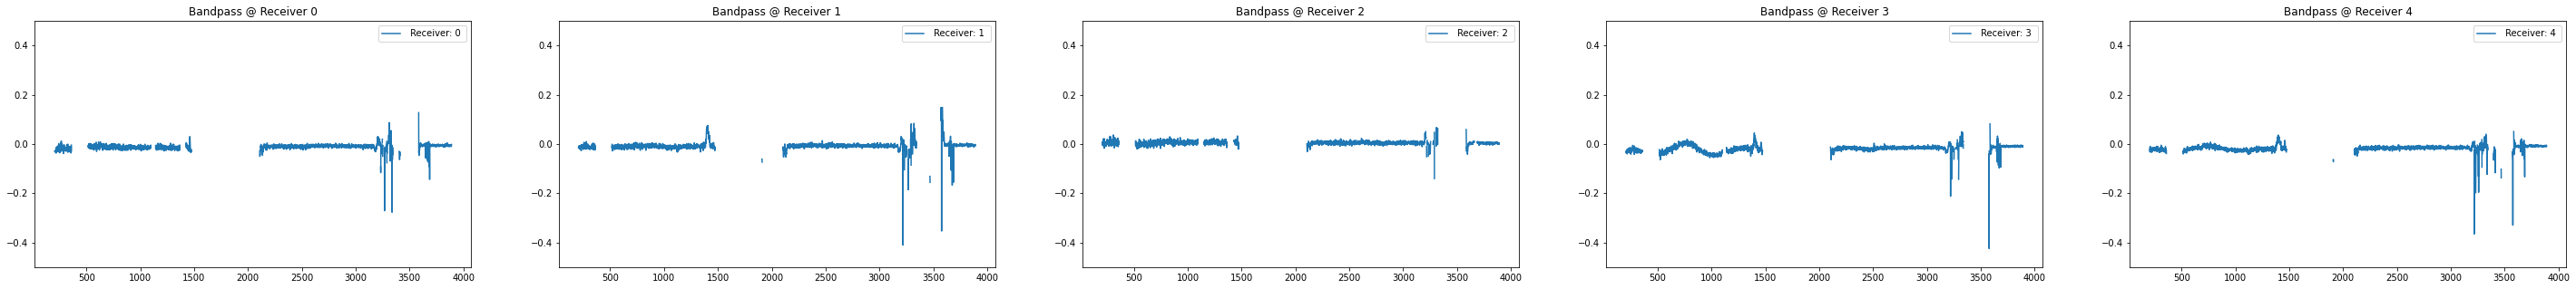

In [105]:
# Note this is the  ABBA SS Bandpass at each receiver
rows = 1 
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*10, rows*5))
[plot(np.nanmean(SS_all_ants[i, :, :], axis=0), ylim= (-0.5,0.5), label= f" Receiver: {i} ", Title= f'Bandpass @ Receiver {i}', ax=ax) for i, ax in zip(range(0, len(ants)), axes.flat)]



### Bandpass plot of the Antenna Averaged ABBA Sky-Subtraction (SSINS)


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Bandpass for SSINS'}>

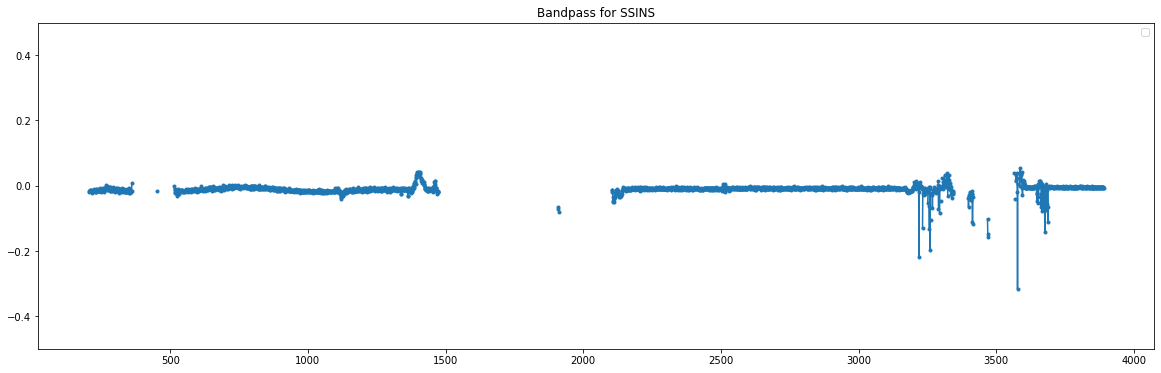

In [11]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

plot(np.nanmean(AbbaAllAnts[:, :], axis=0), ylim= (-0.5,0.5), Title= f'Bandpass for SSINS', linestyle= '-', marker='') 



### Waterfall plots of the ABBA Sky-Subtraction for each Receiver

[<AxesSubplot:title={'center':'abba ss m000'}>,
 <AxesSubplot:title={'center':'abba ss m001'}>,
 <AxesSubplot:title={'center':'abba ss m002'}>,
 <AxesSubplot:title={'center':'abba ss m003'}>,
 <AxesSubplot:title={'center':'abba ss m004'}>]

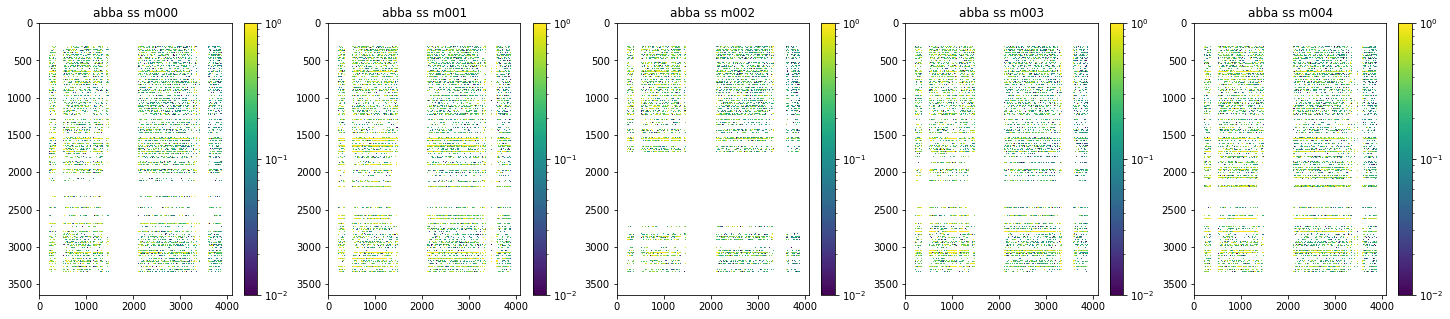

In [12]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=0.01, vmax=1)
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_waterfall(abba_ss_dict[ant_value], ax=ax, Title=f'abba ss {ant_value}', interpolation='nearest', norm=norm) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]

   

### Waterfall plot of the ABBA Sky-Subtraction Antenna Averaged (SSINS)


<AxesSubplot:title={'center':'ABBA Incoherent Averaged Spectrum'}, xlabel='Frequency Chan', ylabel='Time Chan'>

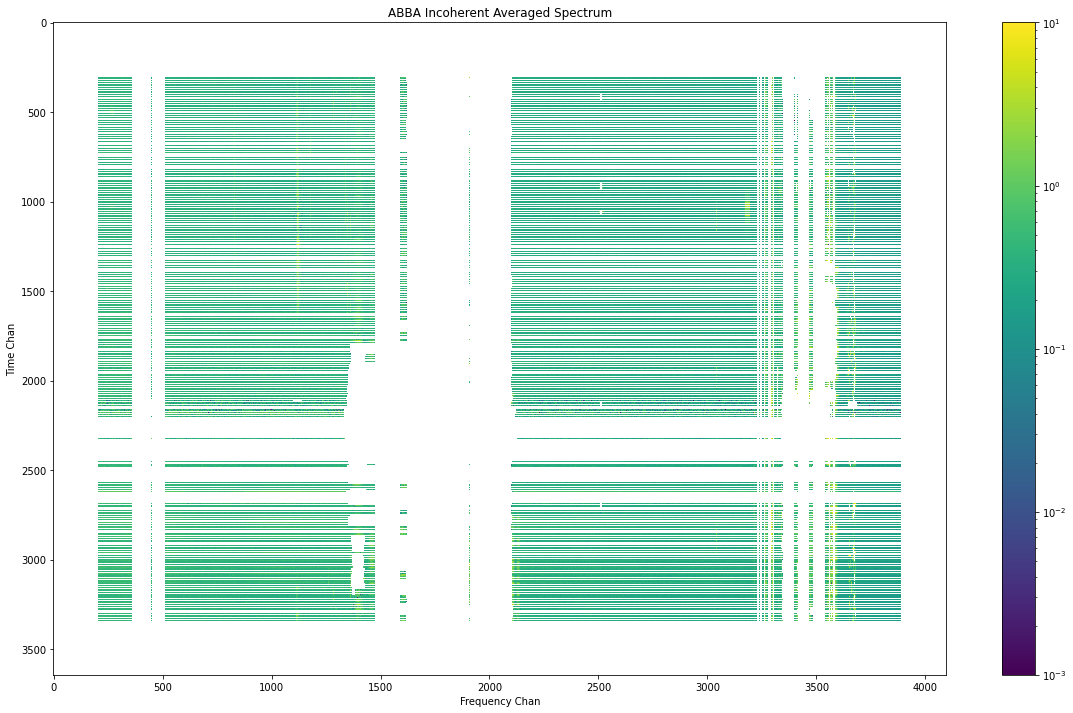

In [25]:
from matplotlib.colors import LogNorm
import matplotlib as mpl
norm = LogNorm(vmin=1e-3, vmax=1e1)

AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)
plot_waterfall(AbbaAllAnts, interpolation='nearest', norm=norm, figsize=(20,12), Title= 'ABBA Incoherent Averaged Spectrum', xlabel='Frequency Chan', ylabel='Time Chan')

### RMS Statistics of the ABBA Sky-Subtractions

RMS Statistics of the sky-subtractions, to determine the level of noise reduction, the signal reduction should correspond to 1 over the square of the antennas we did the average over. I have done the RMS for all receivers, see a lot of differences. 

In [169]:
# RMS calculated over all receivers

rms_all_ants = np.sqrt(np.nanmean(AbbaAllAnts**2)/AbbaAllAnts.shape[0])
print(f'The RMS from averaging over all the receivers is:{rms_all_ants}') 


The RMS from averaging over all the receivers is:0.007806002375344335


In [223]:
# This is calculates the RMS at a receiver level for all frequency and time, the RMS over the SS spectrum

def rms(ss_data):
    N = ss_data.shape[0]
    rms_all = np.sqrt(np.nanmean((ss_data)**2)/N)
    return rms_all

In [231]:
# This calculates the RMS at a receiver for a particular frequency in a Sky Subtraction Spectrum

def rms_mu(ss_data, mu):
    
    N = ss_data.shape[0]
    rms_mu = np.sqrt(np.nanmean((ss_data[:,mu])**2)/N)
    
    return rms_mu

In [232]:
rms_mu(abba_vis, mu=3000)

0.00585032853761648

In [181]:
rms_reduced_expected = 1/(np.sqrt(len(ants)))
print(f'The Expected Reduced RMS from averaging over all the receivers is: {rms_reduced_expected}') #Theoretical Value we expect


The Expected Reduced RMS from averaging over all the receivers is: 0.13018891098082389


In [224]:
# Expected RMS Values for each receiver
for ant_value, (abba_vis) in abba_ss_dict.items():

    rms_val =  rms(abba_vis)
    d_rms = rms_val - rms_reduced_expected
    print(f'RMS for reciever {ant_value}  is : {rms_val}')
    #The Expected RMS difference between the Receiver RMS and all antenna average RMS : {d_rms}')


RMS for reciever m000  is : 0.008212148900631188
RMS for reciever m001  is : 0.009415191694946536
RMS for reciever m002  is : 0.007698792077085937
RMS for reciever m003  is : 0.008515164069311753
RMS for reciever m004  is : 0.008475563695713527
RMS for reciever m005  is : 0.00764091177904013
RMS for reciever m006  is : 0.009480708572528257
RMS for reciever m007  is : 0.00738776353213226
RMS for reciever m008  is : 0.006720358099033929
RMS for reciever m009  is : 0.007836675606155915
RMS for reciever m010  is : 0.009083004793659769
RMS for reciever m011  is : 0.008866734103286984
RMS for reciever m012  is : 0.007227677410074508
RMS for reciever m013  is : 0.00781684681650306
RMS for reciever m014  is : 0.0077570765446988215
RMS for reciever m015  is : 0.008676466900691335
RMS for reciever m016  is : 0.0077807713102431165
RMS for reciever m017  is : 0.006573634762992149
RMS for reciever m018  is : 0.007213735328581419
RMS for reciever m019  is : 0.007862095283970624
RMS for reciever m020

In [226]:
# RMS for all Recievers ABBA Sky Subtraction

for ant_value, (abba_vis) in abba_ss_dict.items():
    rms_value =  rms(abba_vis)
    d_rms = rms_value - rms_all_ants
    print(f'RMS for reciever {ant_value}  is : {rms_value}, The difference between the Receiver RMS and all antenna average RMS : {d_rms}')



RMS for reciever m000  is : 0.008212148900631188, The difference between the Receiver RMS and all antenna average RMS : 0.00040614652528685354
RMS for reciever m001  is : 0.009415191694946536, The difference between the Receiver RMS and all antenna average RMS : 0.001609189319602201
RMS for reciever m002  is : 0.007698792077085937, The difference between the Receiver RMS and all antenna average RMS : -0.00010721029825839796
RMS for reciever m003  is : 0.008515164069311753, The difference between the Receiver RMS and all antenna average RMS : 0.0007091616939674181
RMS for reciever m004  is : 0.008475563695713527, The difference between the Receiver RMS and all antenna average RMS : 0.000669561320369192
RMS for reciever m005  is : 0.00764091177904013, The difference between the Receiver RMS and all antenna average RMS : -0.00016509059630420448
RMS for reciever m006  is : 0.009480708572528257, The difference between the Receiver RMS and all antenna average RMS : 0.0016747061971839217
RMS 

 #### RMS Result Discussion:

### Histogram plots of the ABBA Sky-Subtraction Waterfalls

[<AxesSubplot:title={'center':'Histogram for Residual data of Receiver m000'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m001'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m002'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m003'}>,
 <AxesSubplot:title={'center':'Histogram for Residual data of Receiver m004'}>]

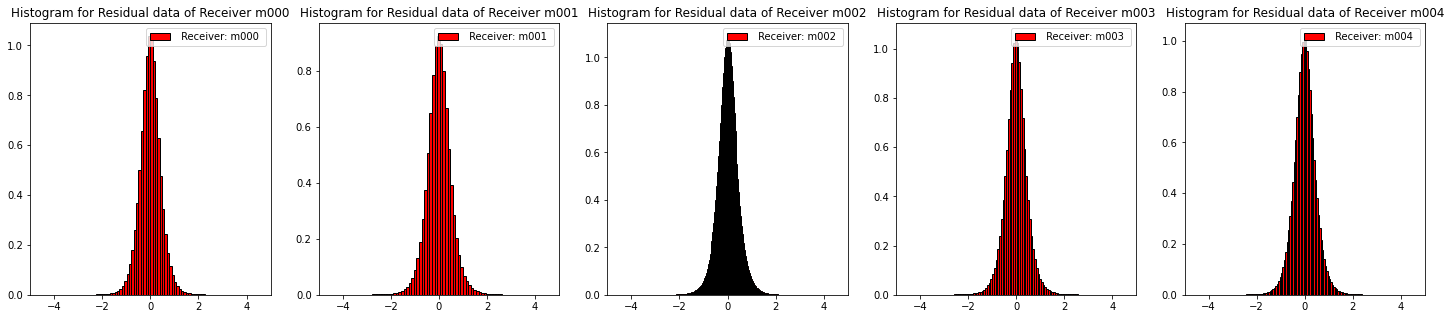

In [421]:
rows = 1 #2
columns = 5

fig, axes = plt.subplots(nrows=rows, ncols=columns, figsize=(columns*5, rows*5))
[plot_hist(np.ravel(abba_ss_dict[ant_value]),label= f" Receiver: {ant_value} ", Title=f'Histogram for Residual data of Receiver {ant_value}', bins=1000, xlim=(-5,5), ax=ax) for ant_value, ax in zip(abba_ss_dict, axes.flat) if ant_value in abba_ss_dict]
    
   

### Histogram plots of the ABBA Antenna Averaged Sky-Subtraction Waterfalls (SSINS)


<AxesSubplot:title={'center':'All Antenna ABBA SS Average Residual Distribution'}, xlabel='Amplitudes', ylabel='Counts'>

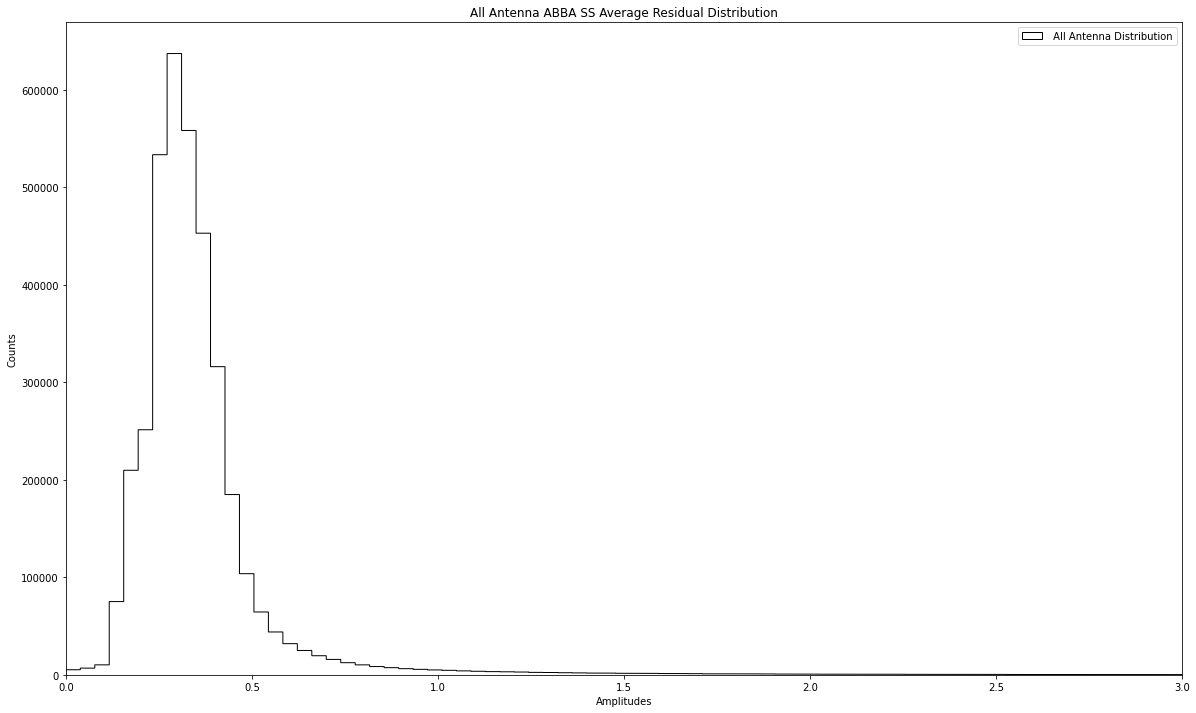

In [70]:
AbbaAllAnts = np.nanmean(np.abs(SS_all_ants[:, :,:]), axis=0)

plot_hist(np.ravel(AbbaAllAnts),label= " All Antenna Distribution", Title=f'All Antenna ABBA SS Average Residual Distribution', bins=1000, xlim=(0,3), figsize=(20,12), histtype='step',xlabel='Amplitudes', ylabel='Counts')
    
    

Diagram : https://app.diagrams.net/?src=about
Statistics: https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

In [121]:
from scipy import stats 

# Null Hypothesis : This test will help us determine wether the residual data is normally distributed.

In [122]:
abba_ss_dict.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004'])

In [123]:
x = abba_ss_dict['m003'] # Test the scipy stats on one ss item


In [124]:
xx = x[:,3001]          # Choose  all time channels, and  a specific frequency to run this test
xx

array([nan, nan, nan, ..., nan, nan, nan])

In [125]:
y = xx[~np.isnan(xx)]  # Exclude the nans, since the following error occurs with nan_policy='omit' :  ValueError: kurtosistest requires at least 5 observations; 0 observations were given.
y.shape

(1252,)

In [127]:
res_x = stats.normaltest(y)  # This test had the default option of two-sided, which checks if the kurtosis of the distribution is different from a normal distribution, so if the p-value is small we can reject this hypothesis
res_x.pvalue

# pvalue = 1.5664087424312112e-06 is very small indicates that we reject the null (null was set as that our distribution is different from a normal)

1.5664087424312112e-06

In [ ]:
#z_score = ((IncoherentSpectrum-meanEst))/np.sqrt(c*np.nansum((IncoherentSpectrum - meanEst)**2)/no_dishes)
   

### Z- Score Calculation of the ABBA Incoherent Averaged Spectrum

In [17]:
def cal_zscore(SS_all_spectrums):

    """ This fuction calculates the z-scores.
    Parameters:
    ----------
    SS_all_spectrums: Array of all antenna sky subtraction spectrums, has the shape (no.Dishes, Time, Frequency)
    
    Returns:
    --------

    z_score: 2D array of the normalised Incoherent Spectrum.
    
    """
    
    IncoherentSpectrum = np.nanmean(np.abs(SS_all_spectrums), axis=0)
    no_dishes = SS_all_spectrums.shape[0]
    c_fold = np.pi / 2 - 1  #Auto C_fold Ratio
    meanEst = np.nanmean(IncoherentSpectrum, axis=0) #Time axis averaged MeanEstimate
    std_sq = c_fold*meanEst**2 
  
    z_score = ((IncoherentSpectrum-meanEst))/np.sqrt(std_sq/no_dishes)
   
    
    return z_score  #returns 2D array of the z scores
    

In [21]:
z_score_map_abba = cal_zscore(SS_all_ants)
z_score_map_abba[3010:3050, 3001]

array([-0.96122782,         nan,         nan,         nan,         nan,
       -1.76194549, -1.4483216 , -0.40722976, -1.32063865, -0.41853075,
        0.31980659,         nan,         nan,         nan,         nan,
        0.42589906,  1.30892293, -0.78716767,  0.87060079,  0.24905068,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,  0.93623924, 14.93942289,
               nan,         nan,         nan,         nan,  2.51749305,
        4.82618061,  1.54327554,  1.14266035, -0.44423013, -0.79627548])

In [19]:
min= np.nanmin(z_score_map_abba)
max = np.nanmax(z_score_map_abba)
mean =np.nanmean(z_score_map_abba)
median = np.nanmedian(z_score_map_abba)

print(f'z_score_map_abba minimum val is: {min}')
print(f'z_score_map_abba maximum val is: {max}')
print(f'z_score_map_abba mean val is: {mean}')
print(f'z_score_map_abba median val is: {median}')
print(f'z_score_map_abba range val is: {max-min}')

z_score_map_abba minimum val is: -10.166826704491546
z_score_map_abba maximum val is: 470.1916270337498
z_score_map_abba mean val is: -8.43242617399089e-18
z_score_map_abba median val is: -0.5860721165451335
z_score_map_abba range val is: 480.35845373824134


<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction)'}, xlabel='Frequency Chan', ylabel='Time Chan'>

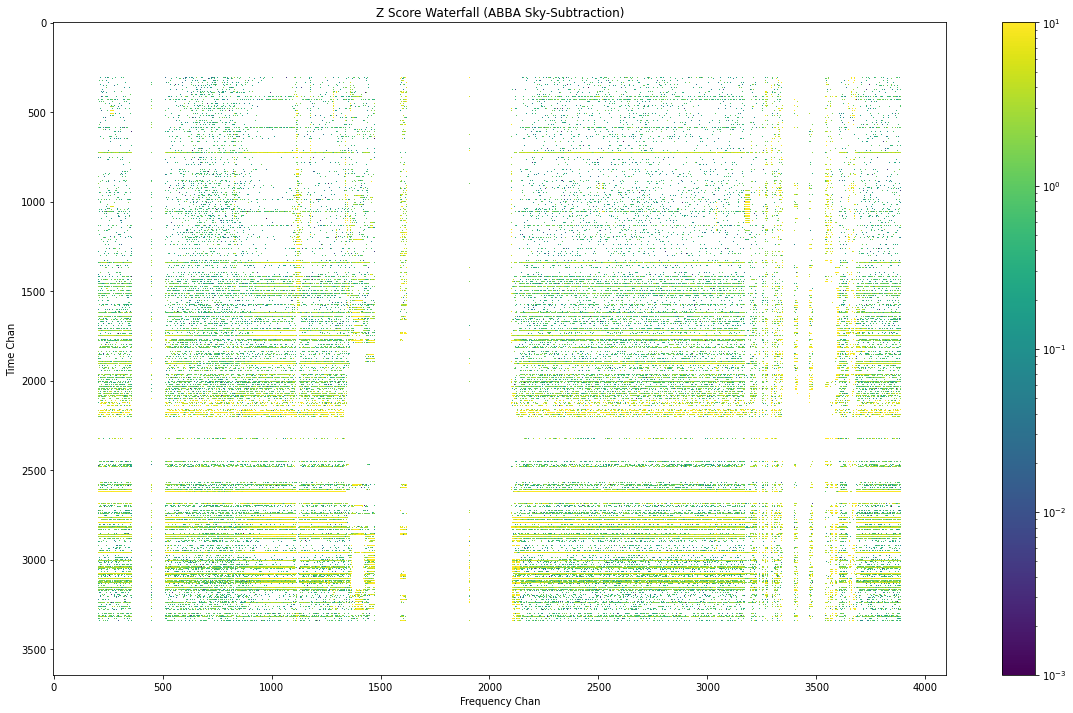

In [22]:
norm = LogNorm(vmin=1e-3, vmax=1e1)

plot_waterfall(z_score_map_abba, Title = 'Z Score Waterfall (ABBA Sky-Subtraction)', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest', norm=norm)

### Z-Score Waterfall

<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags'}, xlabel='Frequency Chan', ylabel='Time Chan'>

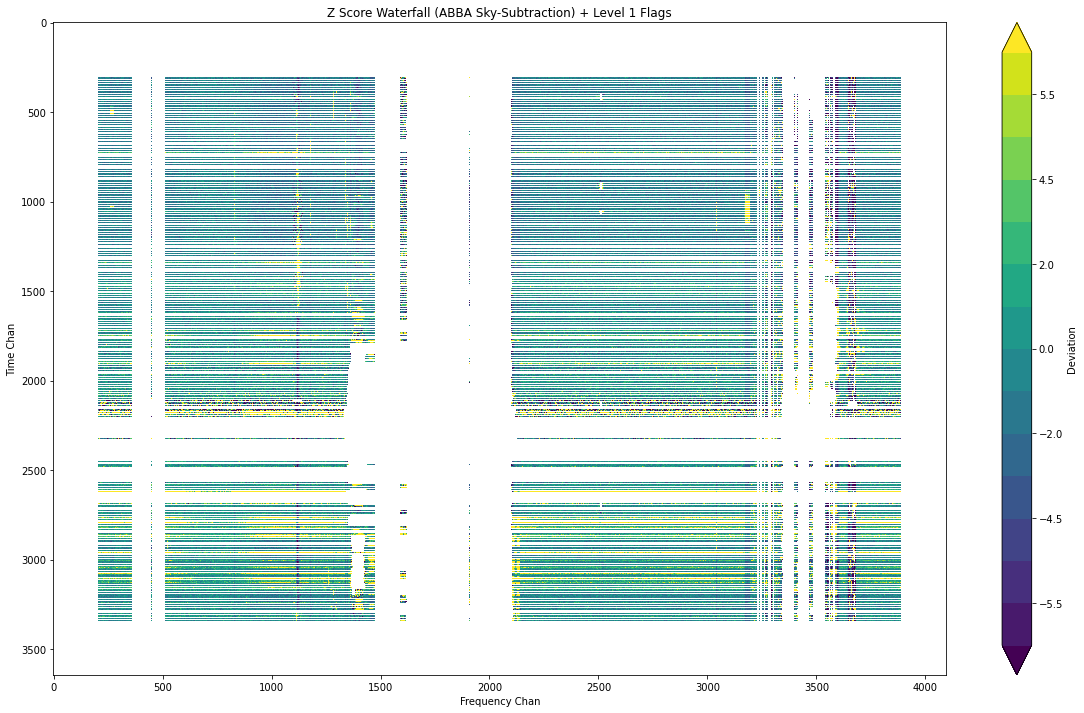

In [23]:
from matplotlib.colors import LogNorm
import matplotlib as mpl

cmap = mpl.cm.viridis
bounds =[-6,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')

plot_waterfall(z_score_map_abba, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + Level 1 Flags', figsize=(20,12), cmap=cmap, norm=norm, xlabel='Frequency Chan', ylabel='Time Chan', interpolation='nearest',clabel='Deviation') 

In [40]:
l4_flags_dict = {}
mask_dir = Path('/idia/projects/hi_im/raw_vis/MeerKLASS2021/level4/mask/')
for dish, (vis) in raw_vis_dict.items():
    try:
        with open(mask_dir / f'{fname}_{dish}_level4_mask2', 'rb') as f:
            d3 = pickle.load(f)
            print(d3.keys())
    except(Exception):
        try:
            with open(mask_dir / f'{fname}_{dish}_level4_mask', 'rb') as f:
                d3 = pickle.load(f)
                print(f'mask loaded for dish {dish}')
    
        except FileNotFoundError:
            print(f'No mask file found for dish {dish}')
            
    mask_flags=d3['Inten_mask']
    l4_flags_dict[dish]  = mask_flags


mask loaded for dish m000
mask loaded for dish m001
mask loaded for dish m002
mask loaded for dish m003
mask loaded for dish m004
mask loaded for dish m005
mask loaded for dish m006
No mask file found for dish m007
mask loaded for dish m008
mask loaded for dish m009
mask loaded for dish m010
mask loaded for dish m011
mask loaded for dish m012
No mask file found for dish m013
No mask file found for dish m014
mask loaded for dish m015
mask loaded for dish m016
mask loaded for dish m017
mask loaded for dish m018
mask loaded for dish m019
mask loaded for dish m020
mask loaded for dish m021
mask loaded for dish m023
No mask file found for dish m024
mask loaded for dish m025
mask loaded for dish m027
mask loaded for dish m029
mask loaded for dish m030
mask loaded for dish m031
mask loaded for dish m032
No mask file found for dish m033
mask loaded for dish m035
mask loaded for dish m036
mask loaded for dish m037
mask loaded for dish m038
mask loaded for dish m039
mask loaded for dish m040
mas

In [ ]:
vis_data = raw_vis_dict['m000']
mask_l4 = l4_flags_dict['m000']

l4_masked_data = np.ma.masked_array(vis_data, mask=mask_l4, fill_value = np.nan)

In [43]:
print(f'Z map data shape:{z_score_map_abba.shape}')
print(f'L4 mask data shape:{mask_l4.shape}')

#Shapes of the z map and mask_l4 are different, i have reshaped the masked_l4 array to match the z map data

Z map data shape:(3644, 4096)
L4 mask data shape:(3647, 4096)


In [44]:
z_data_shape = z_score_map_abba.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [45]:
z_map_abba_l4_masked = np.ma.masked_array(z_score_map_abba, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Mask'}, xlabel='Frequency Chan', ylabel='Time Chan'>

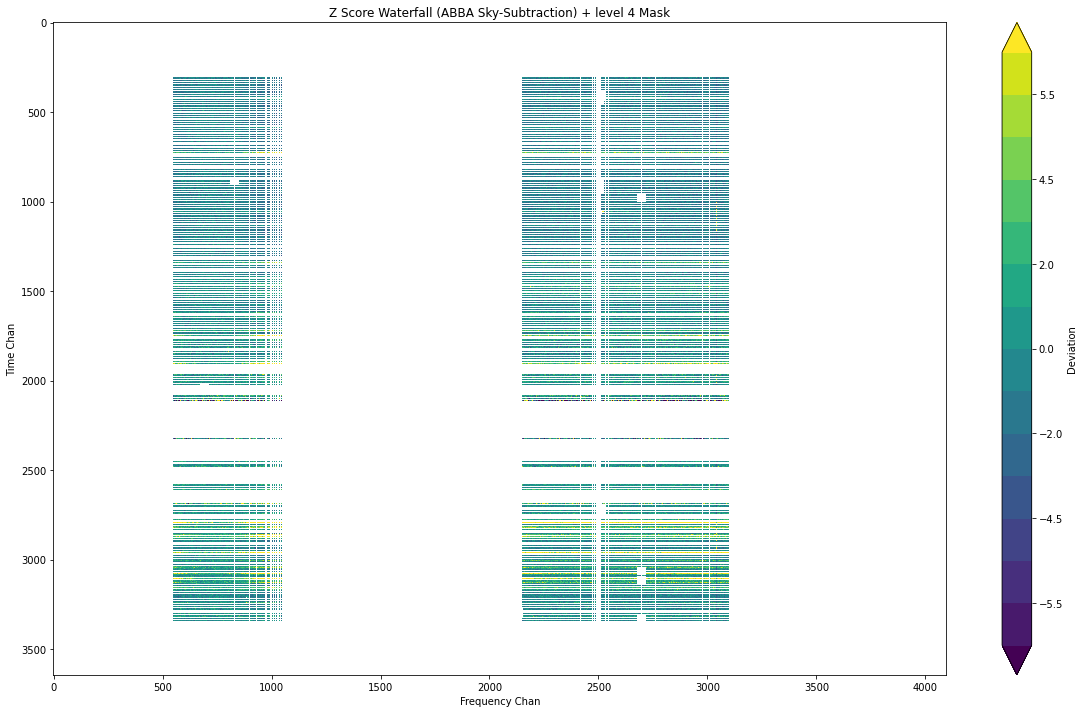

In [66]:
bounds = [-6.5,-5.5,-5,-4.5,-3, -2,-1,0,1,2,3,4.5,5, 5.5, 6.5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')
plot_waterfall(z_map_abba_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (ABBA Sky-Subtraction) + level 4 Mask', figsize=(20,12), xlabel='Frequency Chan', ylabel='Time Chan',clabel='Deviation' )

In [50]:
def plot_hist(x : np.ndarray, label=None, Title =None, xlim : tuple = None, figsize=None, ax=None, bins=None, alpha=None, density=None, color=None ,edgecolor=None, histtype=None, xlabel=None, ylabel=None):
   
    if ax is None:  # Create a new figure and axes if not being passed in as a parameter
        fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.hist(x, label=label,bins=bins, alpha=alpha, density=density, color=color, edgecolor=edgecolor, histtype=histtype)
    ax.legend()
    ax.set_title(Title)
    ax.set_xlabel(xlabel=xlabel)
    ax.set_ylabel(ylabel=ylabel)
    if xlim is not None:
        ax.set_xlim(*xlim)
        
    return ax

### Z-Score Distribution

No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Z-Score Histogram Level 1'}, xlabel='Deviation', ylabel='Counts'>

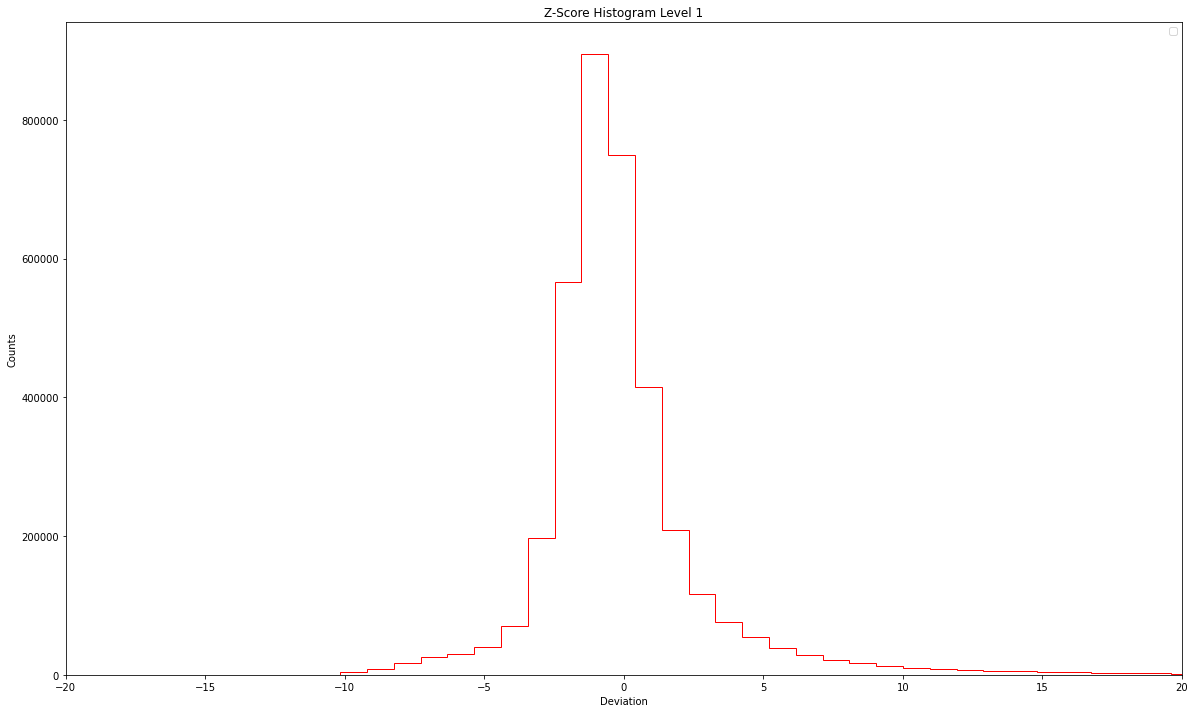

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))

plot_hist(np.ravel(z_score_map_abba), Title='Z-Score Histogram Level 1', bins=500, xlim=(-20,20 ), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


No handles with labels found to put in legend.


(-12.0, 15.0)

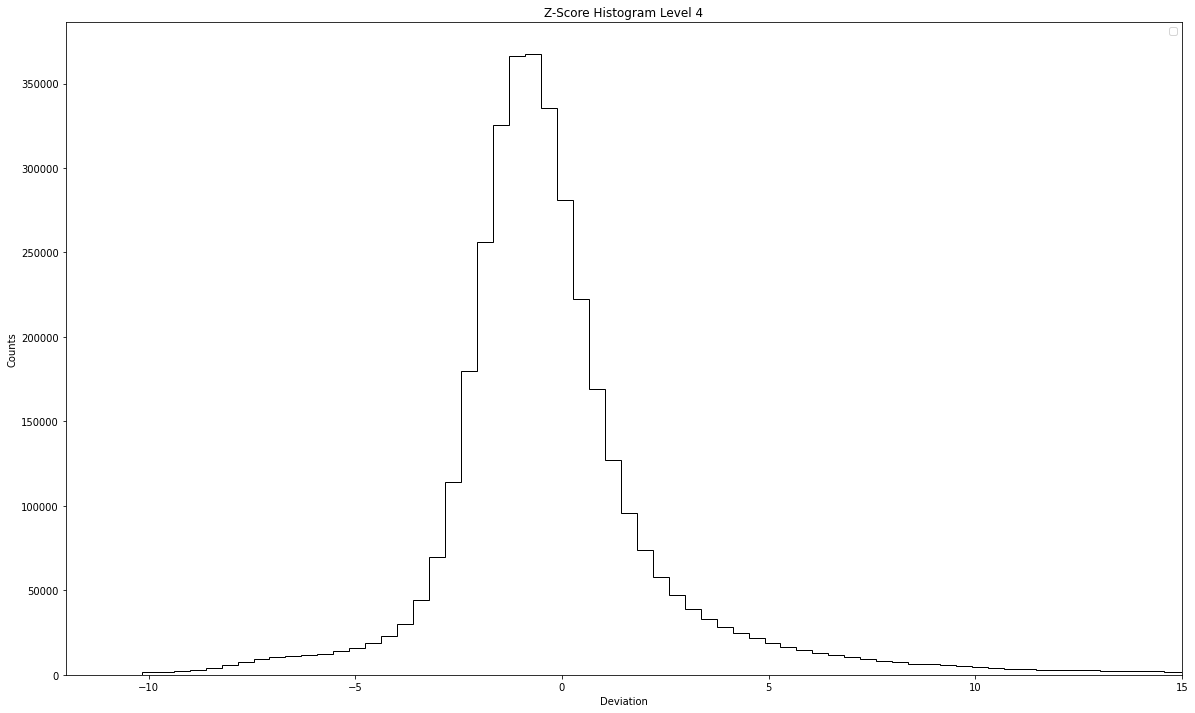

In [65]:
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(20, 12))


plot_hist(np.ravel(z_map_abba_l4_masked), Title=f'Z-Score Histogram Level 4', bins=500, xlim=(-10, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)
#ax.plot(bin_edges[:-1], model_y)
ax.set_xlim(-12,15)
#ax.set_ylim([np.amin(counts[counts > 0])*1e-3, np.amax(counts)]*1e-3)
    

<AxesSubplot:xlabel='Deviation', ylabel='Counts'>

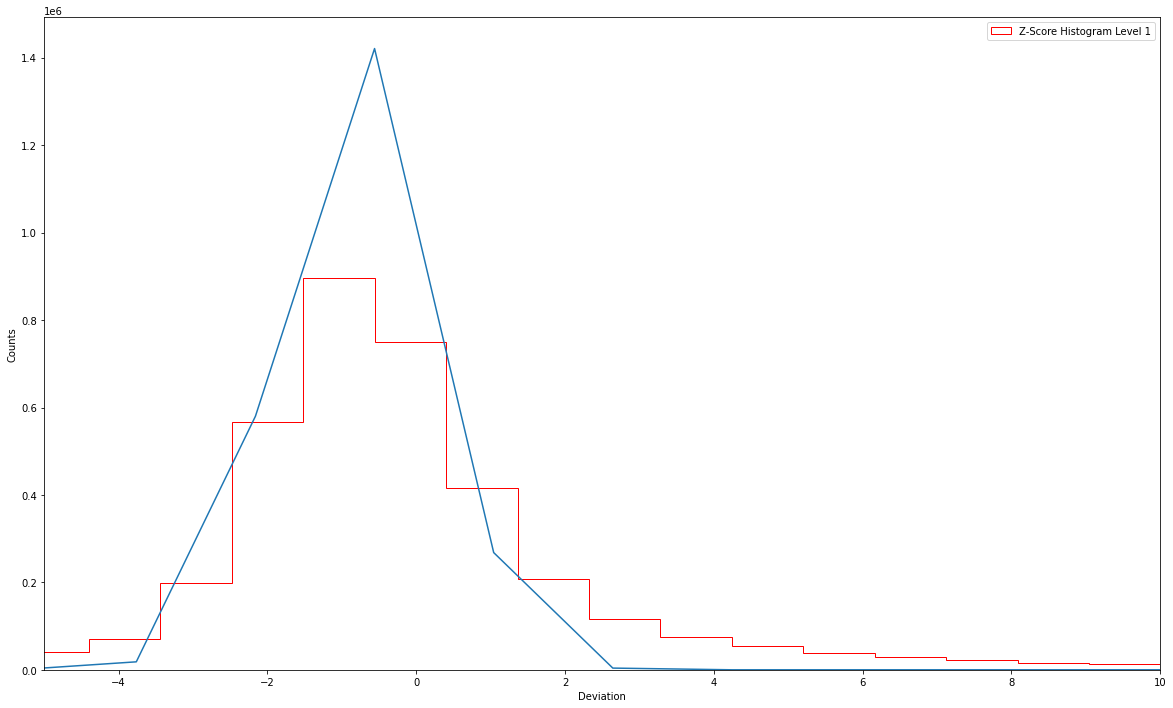

In [61]:

data = np.ravel(z_score_map_abba)

data1 = data[~np.isnan(data)]

counts, bin_edges = np.histogram(data1, bins=300, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values
model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
#model_y = model_y*np.sum(counts)


fig, ax = plt.subplots(figsize=(20, 12))
ax.plot(bin_edges[:-1], model_y)
plot_hist(np.ravel(z_score_map_abba), label='Z-Score Histogram Level 1', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax, edgecolor='r')
#plot_hist(np.ravel(z_map_abba_l4_masked), label='Z-Score Histogram Level 4', bins=500, xlim=(-5, 10), figsize=(20,12), histtype='step', density=False, xlabel='Deviation', ylabel='Counts', ax=ax)


In [ ]:
data = np.ravel(z_map_abba_l4_masked)



counts, bin_edges = np.histogram(data, bins=bins, density=False)

def model_func(bin_edges, mu, sigma):
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    model_values = np.exp(-0.5 * ((bin_centers - mu) / sigma)**2) / (sigma * np.sqrt(2 * np.pi))
    return model_values
model_prob = model_func(bin_edges, mu=0, sigma=1)
model_y = model_prob*np.sum(counts)
#model_y = model_y*np.sum(counts)

array([2217, 2425, 2677, ...,    0,    0,    1])

### Sky Subtraction method : Time Differencing 

### Scipy Statistics of the ABBA Sky-Subtraction Waterfall Arrays 
I still have more tests to run, but this will be the general approach im thinking about taking for evaluating the kurtosis, not sure if i should use np.ravel(ss_waterfalls)

In [26]:
#After the masking of the data and the flags we apply the sky-subtraction function
SS_dict = {}
for ant_value,(masked_vis) in masked_vis_dict.items():
    # Applying the function to create SkySubtraction
    SS_data = SkySubtraction(masked_vis)
    SS_dict[ant_value] = SS_data


In [18]:
SS_dict.items()

dict_items([('m000', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m001', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m002', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])), ('m003', array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,

In [122]:
ss_vis = np.stack(list(SS_dict.values()), axis=0)

In [123]:
ss_vis_AllAntsAve = np.nanmean(np.abs(ss_vis[:,:,:]), axis=0)


In [28]:
ss_vis_AllAntsAve.shape

(3646, 4096)

In [163]:
z_score_map_ss = cal_zscore(ss_vis)

<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction)'}>

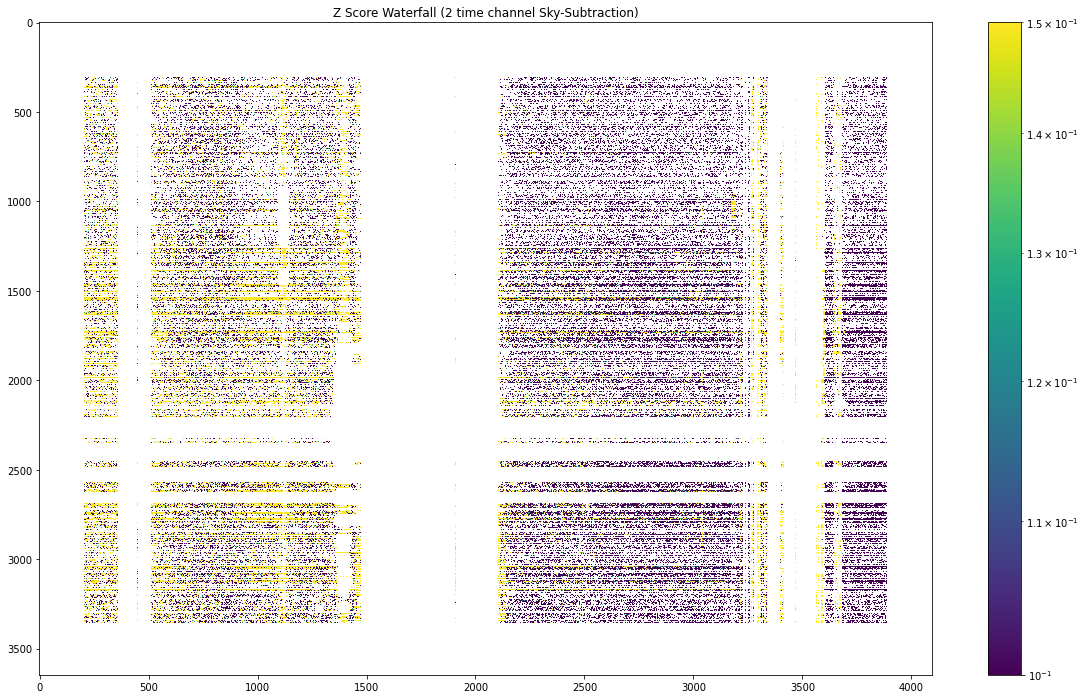

In [164]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=1e-1, vmax=1.5e-1)

plot_waterfall(z_score_map_ss, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction)', figsize=(20,12) )

In [166]:
z_data_shape = z_score_map_ss.shape
resized_mask_l4 = np.resize(mask_l4, z_data_shape)

In [167]:
z_map_ss_l4_masked = np.ma.masked_array(z_score_map_ss, mask=resized_mask_l4, fill_value = np.nan)


<AxesSubplot:title={'center':'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask'}>

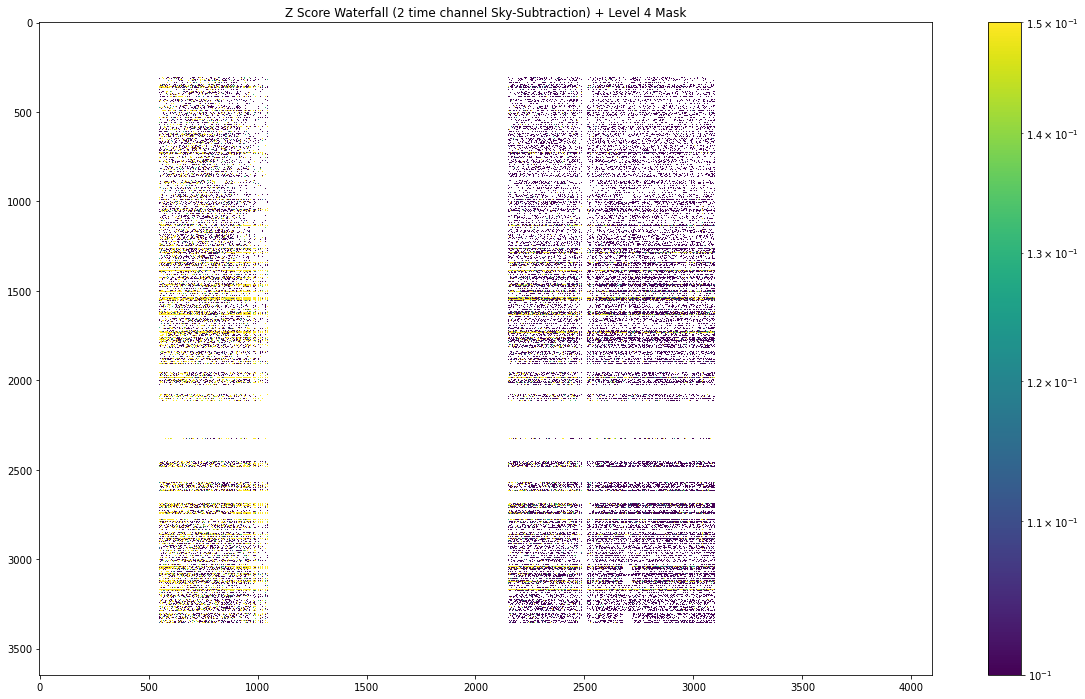

In [169]:
from matplotlib.colors import LogNorm

norm = LogNorm(vmin=1e-1, vmax=1.5e-1)

plot_waterfall(z_map_ss_l4_masked, interpolation='nearest', norm=norm, Title = 'Z Score Waterfall (2 time channel Sky-Subtraction) + Level 4 Mask', figsize=(20,12) )

### Comparision plots of the sky subtacion with lower level flags

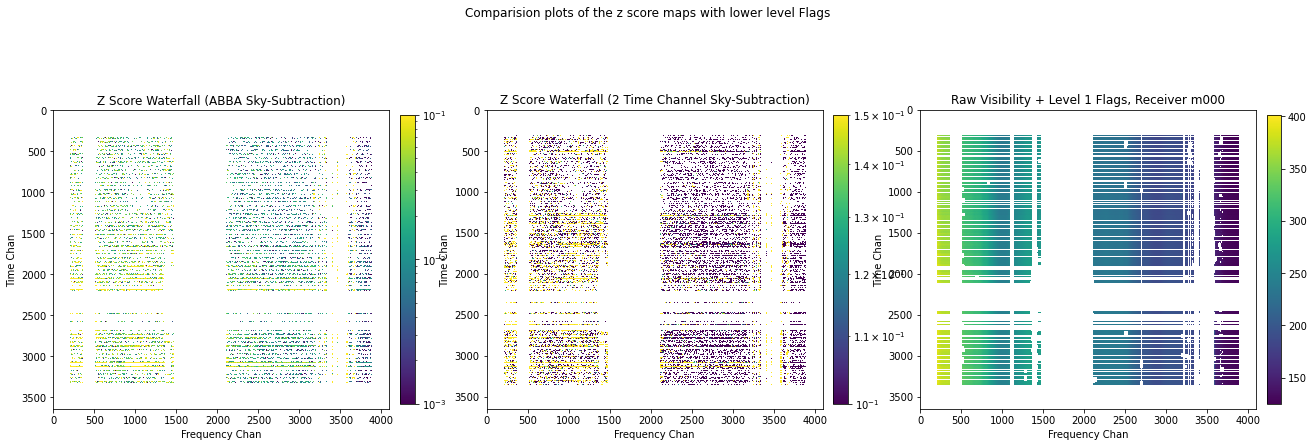

In [154]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-3, vmax=1e-1)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 = axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=LogNorm(vmin=1e-1, vmax=1.5e-1))
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(masked_vis_dict['m000'].filled(), interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 1 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')


fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')

plt.show()

In [41]:
l4_flags_dict.keys()

dict_keys(['m000', 'm001', 'm002', 'm003', 'm004', 'm005', 'm006', 'm007', 'm008', 'm009', 'm010', 'm011', 'm012', 'm013', 'm014', 'm015', 'm016', 'm017', 'm018', 'm019', 'm020', 'm021', 'm023', 'm024', 'm025', 'm027', 'm029', 'm030', 'm031', 'm032', 'm033', 'm035', 'm036', 'm037', 'm038', 'm039', 'm040', 'm041', 'm042', 'm043', 'm044', 'm045', 'm046', 'm047', 'm048', 'm049', 'm050', 'm051', 'm052', 'm053', 'm054', 'm055', 'm056', 'm057', 'm058', 'm059', 'm061', 'm062', 'm063'])

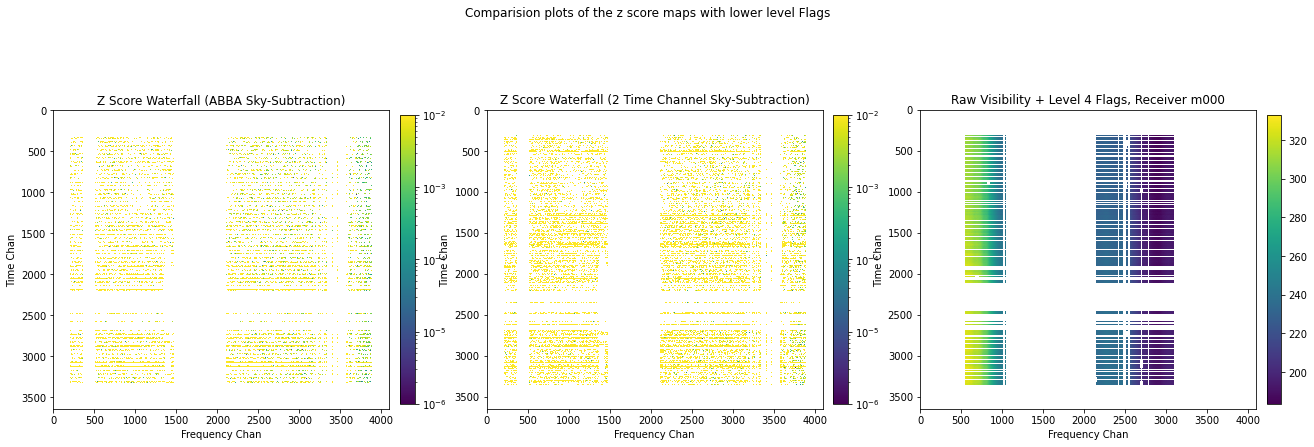

In [133]:
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=1e-6, vmax=1e-2)
fig, axes = plt.subplots(1,3, figsize=(22,12))


im0 = axes[0].imshow(z_score_map_abba, interpolation='nearest', norm=norm )
axes[0].set_title('Z Score Waterfall (ABBA Sky-Subtraction)')
axes[0].set_xlabel('Frequency Chan')
axes[0].set_ylabel('Time Chan')

im1 =axes[1].imshow(z_score_map_ss, interpolation='nearest', norm=norm )
axes[1].set_title('Z Score Waterfall (2 Time Channel Sky-Subtraction)')
axes[1].set_xlabel('Frequency Chan')
axes[1].set_ylabel('Time Chan')


im2 = axes[2].imshow(l4_masked_data, interpolation='nearest')
axes[2].set_title('Raw Visibility + Level 4 Flags, Receiver m000')
axes[2].set_xlabel('Frequency Chan')
axes[2].set_ylabel('Time Chan')

for ax, im in zip(axes, [im0, im1, im2]):
    cbar = plt.colorbar(im, ax=ax,fraction=0.04, pad=0.03)
    #cbar.set_label('Colorbar Label')

 
fig.suptitle('Comparision plots of the z score maps with lower level Flags')
plt.subplots_adjust(top=1.25)
plt.savefig('Comparision plots of the z score maps with lower level Flags.png')
plt.show()